In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("D:\\Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.shape

(101, 18)

In [6]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
# sns.pairplot(df)
plt.show()

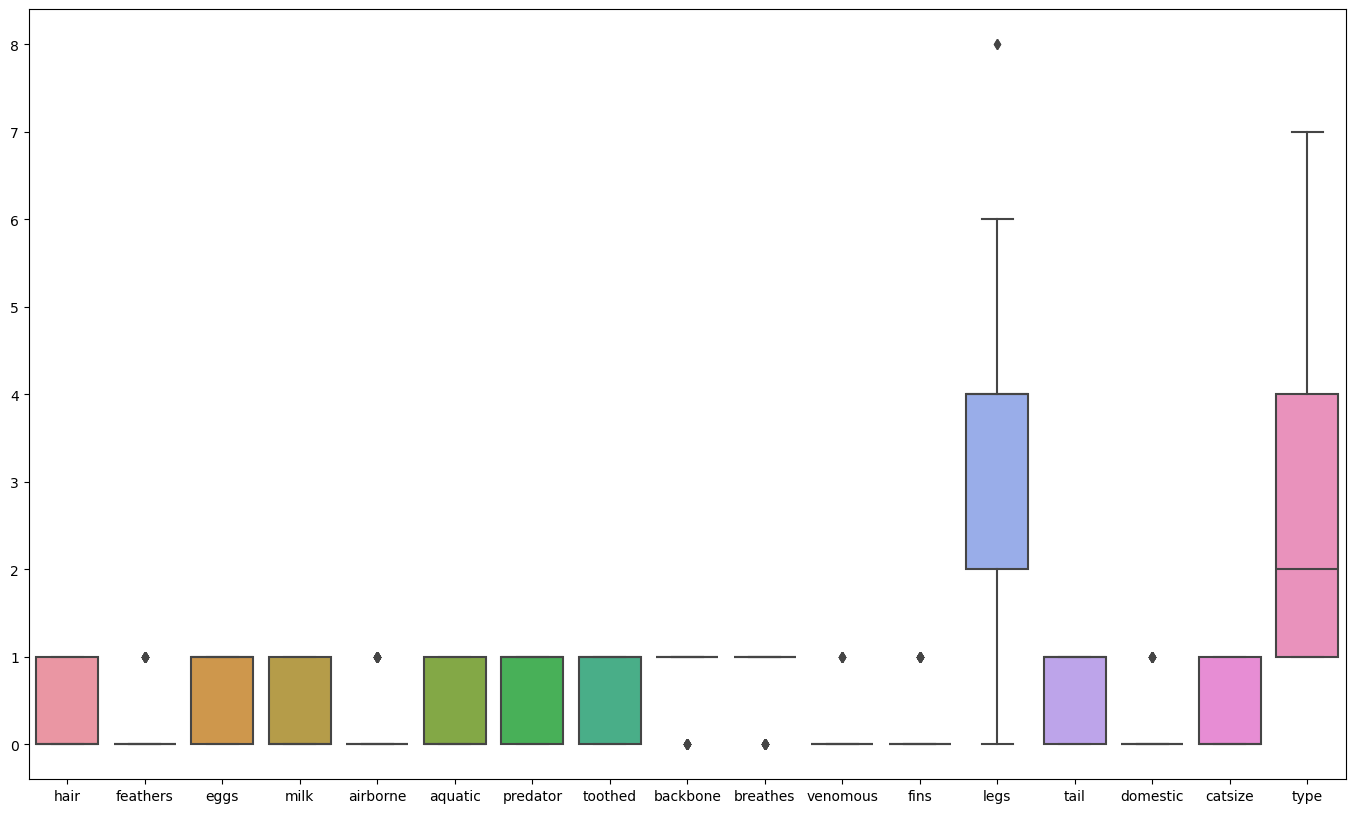

In [8]:
plt.figure(figsize=(17,10))
sns.boxplot(df)
plt.show()

In [9]:
x = df.drop(['animal name', 'type'], axis=1)
y=df["type"]

In [10]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [11]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=20)

In [48]:
kvalue=np.array(range(1,30))
parm_grid=dict(n_neighbors=kvalue)
parm_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [49]:
knn=KNeighborsClassifier()
grid=GridSearchCV(estimator=knn,param_grid=parm_grid,cv=5)
grid.fit(x_train,y_train)

C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [50]:
print(grid.best_score_*100)

97.5


In [51]:
print(grid.best_params_)

{'n_neighbors': 1}


In [52]:
best_knn = grid.best_estimator_
best_knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [53]:
print(x_train.shape)  # Should be (n_samples, 16)


(81, 16)


In [83]:
print(x_test.shape)
print(x_train.shape)

(20, 16)
(81, 16)


In [84]:
# x_test_padded = np.zeros((20, 16))
# x_test_padded[:, 0] = x_test[:, 0]
# 


In [85]:
# y_pred = grid.best_estimator_.predict(x_test_padded)

y_pred = grid.best_estimator_.predict(x_test)


In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [87]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 1.0


In [88]:
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


Recall: 1.0


In [89]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)



F1-score: 1.0


C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.w

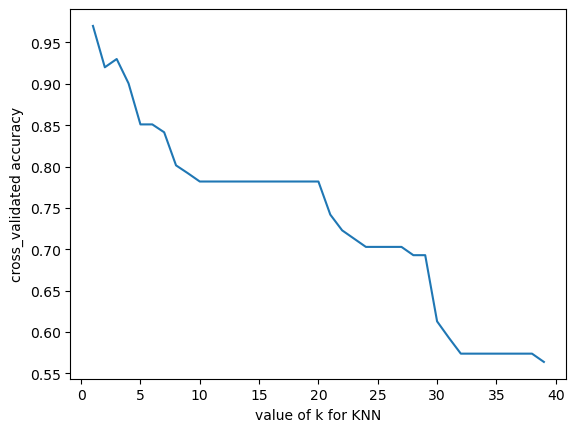

In [92]:
k_range=range(1,40)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=5)
    k_scores.append(score.mean())


plt.plot(k_range,k_scores)

plt.xlabel('value of k for KNN')
plt.ylabel('cross_validated accuracy')
plt.show()

In [1]:
'''1. What are the key hyperparameters in KNN?
A. 1. K (Number of Neighbors): The number of nearest neighbors to consider when making a prediction.

2. Distance Metric: The method used to calculate the distance between data points, such as:
    - Euclidean distance
    - Manhattan distance
    - Minkowski distance
    - Cosine similarity

3. Weight Function: The method used to weight the contributions of each neighbor, such as:
    - Uniform weighting
    - Distance-based weighting (e.g., inverse distance)'''

'1. What are the key hyperparameters in KNN?\nA. 1. K (Number of Neighbors): The number of nearest neighbors to consider when making a prediction.\n\n2. Distance Metric: The method used to calculate the distance between data points, such as:\n    - Euclidean distance\n    - Manhattan distance\n    - Minkowski distance\n    - Cosine similarity\n\n3. Weight Function: The method used to weight the contributions of each neighbor, such as:\n    - Uniform weighting\n    - Distance-based weighting (e.g., inverse distance)'

In [2]:
'''2. What distance metrics can be used in KNN?
A. 
1. Euclidean Distance (L2 distance): Most commonly used, suitable for continuous data.

2. Manhattan Distance (L1 distance): Suitable for discrete or categorical data, and data with varying scales.

3. Minkowski Distance (Lp distance): Generalization of Euclidean and Manhattan distances, flexible and widely applicable.

4. Cosine Similarity: Suitable for text data, high-dimensional data, and data with varying lengths.

5. Hamming Distance: Suitable for binary or categorical data, and data with a small number of features.
'''

'2. What distance metrics can be used in KNN?\nA. \n1. Euclidean Distance (L2 distance): Most commonly used, suitable for continuous data.\n\n2. Manhattan Distance (L1 distance): Suitable for discrete or categorical data, and data with varying scales.\n\n3. Minkowski Distance (Lp distance): Generalization of Euclidean and Manhattan distances, flexible and widely applicable.\n\n4. Cosine Similarity: Suitable for text data, high-dimensional data, and data with varying lengths.\n\n5. Hamming Distance: Suitable for binary or categorical data, and data with a small number of features.\n'